In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import pickle

In [2]:
# Load data
data = pd.read_csv('../Datasets/kidney.csv')
data

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,target
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [3]:
data.shape # (rows, columns)

(400, 26)

In [4]:
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,target
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [5]:
data.tail()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,target
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd
399,399,58.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,53,6800,6.1,no,no,no,good,no,no,notckd


In [6]:
# Number of classes present of each
data['target'].value_counts()

ckd       248
notckd    150
ckd\t       2
Name: target, dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      400 non-null    int64  
 1   age     391 non-null    float64
 2   bp      388 non-null    float64
 3   sg      353 non-null    float64
 4   al      354 non-null    float64
 5   su      351 non-null    float64
 6   rbc     248 non-null    object 
 7   pc      335 non-null    object 
 8   pcc     396 non-null    object 
 9   ba      396 non-null    object 
 10  bgr     356 non-null    float64
 11  bu      381 non-null    float64
 12  sc      383 non-null    float64
 13  sod     313 non-null    float64
 14  pot     312 non-null    float64
 15  hemo    348 non-null    float64
 16  pcv     330 non-null    object 
 17  wc      295 non-null    object 
 18  rc      270 non-null    object 
 19  htn     398 non-null    object 
 20  dm      398 non-null    object 
 21  cad     398 non-null    object 
 22  ap

In [8]:

# Separate numerical and categorical columns
numerical_cols = data.select_dtypes(include=[np.number]).columns
categorical_cols = data.select_dtypes(exclude=[np.number]).columns

In [9]:

# Handle missing values
num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')

In [10]:
data[numerical_cols] = num_imputer.fit_transform(data[numerical_cols])
data[categorical_cols] = cat_imputer.fit_transform(data[categorical_cols])

In [29]:
# Encode categorical columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le
    
    print(f'Label encoding for {col}:')
    print(dict(zip(le.classes_, le.transform(le.classes_))))

Label encoding for rbc:
{0: 0, 1: 1}
Label encoding for pc:
{0: 0, 1: 1}
Label encoding for pcc:
{0: 0, 1: 1}
Label encoding for ba:
{0: 0, 1: 1}
Label encoding for pcv:
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21, 22: 22, 23: 23, 24: 24, 25: 25, 26: 26, 27: 27, 28: 28, 29: 29, 30: 30, 31: 31, 32: 32, 33: 33, 34: 34, 35: 35, 36: 36, 37: 37, 38: 38, 39: 39, 40: 40, 41: 41, 42: 42, 43: 43}
Label encoding for wc:
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21, 22: 22, 23: 23, 24: 24, 25: 25, 26: 26, 27: 27, 28: 28, 29: 29, 30: 30, 31: 31, 32: 32, 33: 33, 34: 34, 35: 35, 36: 36, 37: 37, 38: 38, 39: 39, 40: 40, 41: 41, 42: 42, 43: 43, 44: 44, 45: 45, 46: 46, 47: 47, 48: 48, 49: 49, 50: 50, 51: 51, 52: 52, 53: 53, 54: 54, 55: 55, 56: 56, 57: 57, 58: 58, 59: 59, 60: 60, 61: 6

In [18]:
# Check the shape and if there are any missing values
print("Data Shape: ", data.shape)
print("Missing Values: \n", data.isnull().sum())

Data Shape:  (400, 26)
Missing Values: 
 id        0
age       0
bp        0
sg        0
al        0
su        0
rbc       0
pc        0
pcc       0
ba        0
bgr       0
bu        0
sc        0
sod       0
pot       0
hemo      0
pcv       0
wc        0
rc        0
htn       0
dm        0
cad       0
appet     0
pe        0
ane       0
target    0
dtype: int64


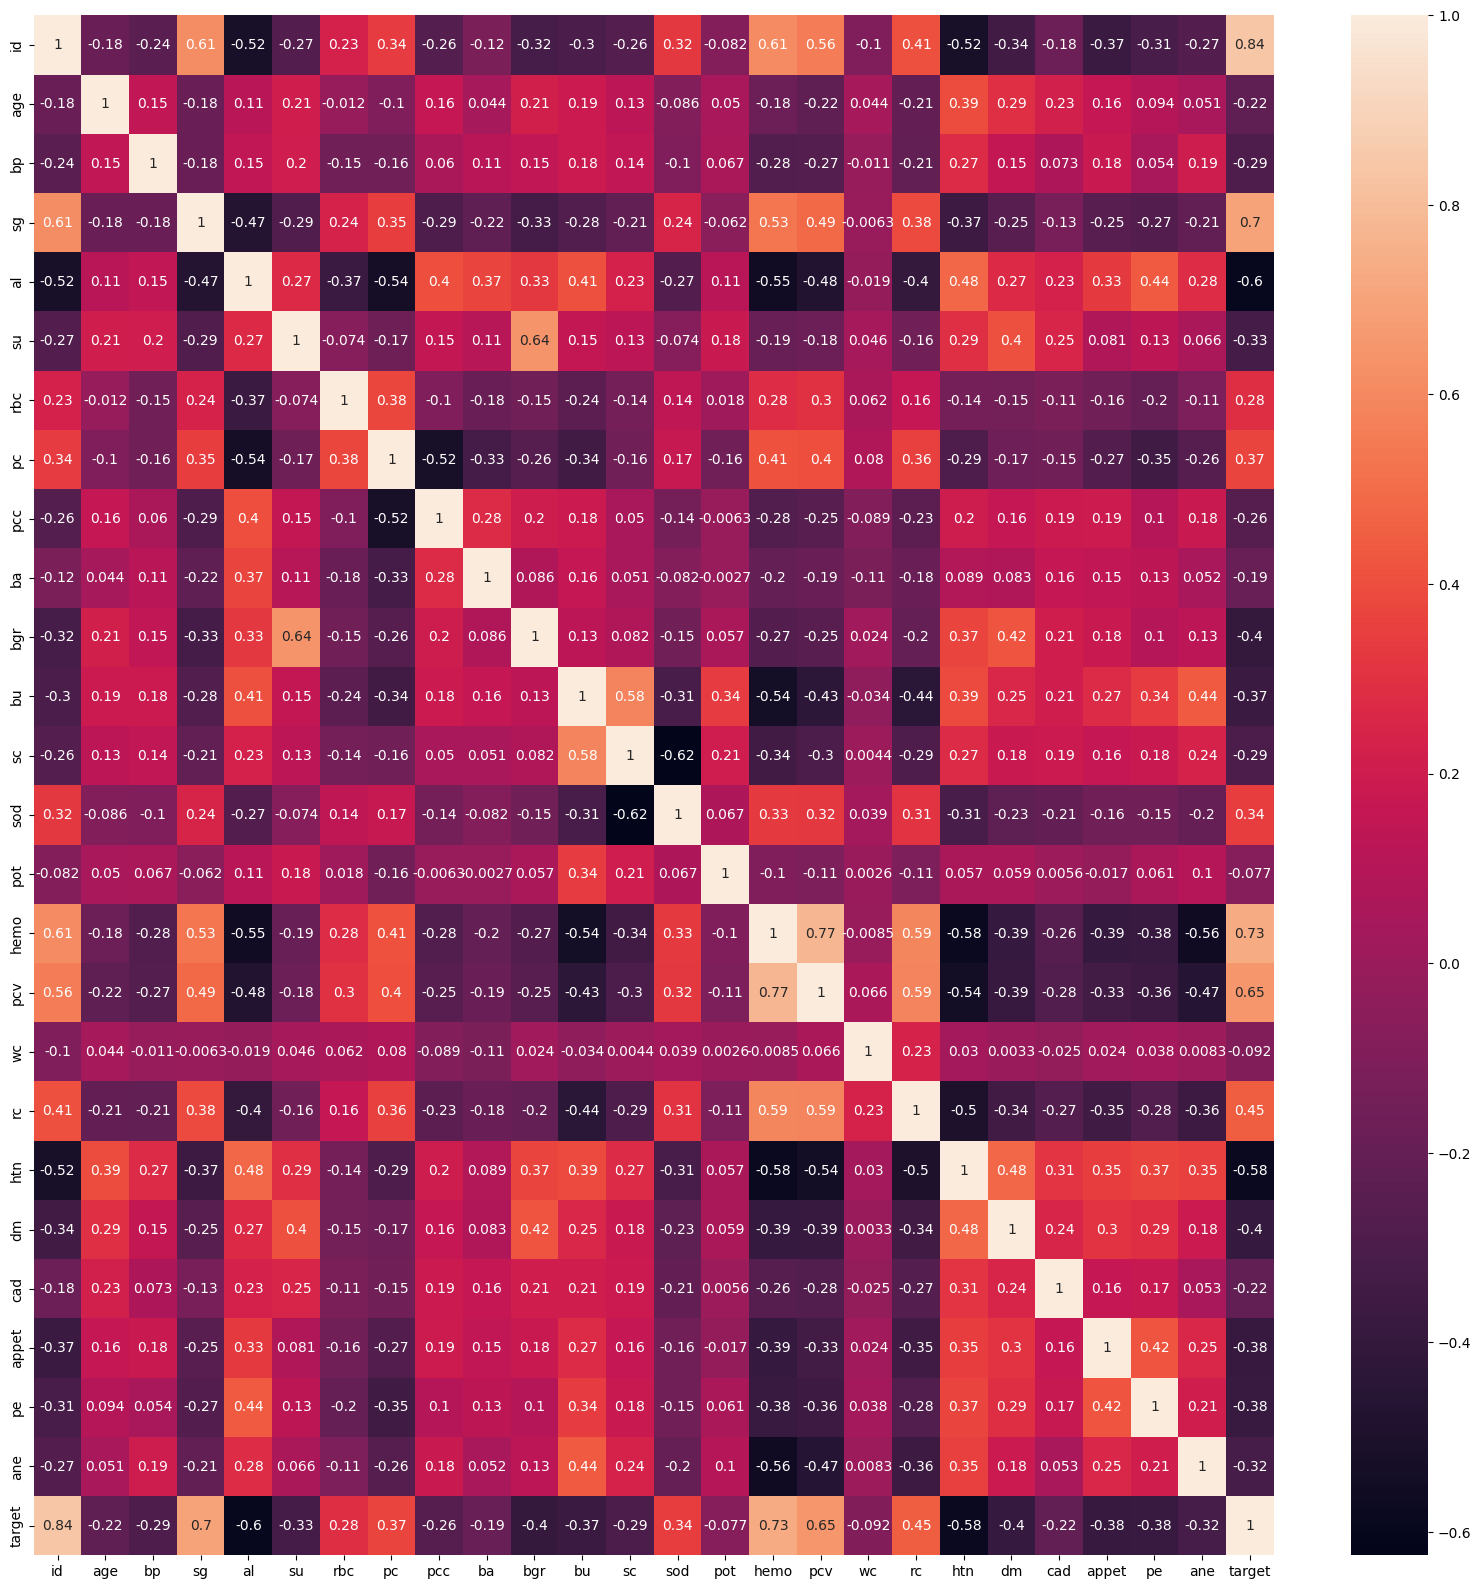

In [19]:

# Correlation heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [23]:

# Split data into features and target variable
X = data.iloc[:, :-1]
y = data['target']
print("Feature Set Shape: ", X.shape)
print("Target Set Shape: ", y.shape)

Feature Set Shape:  (400, 25)
Target Set Shape:  (400,)


In [24]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
print("Train Set: ", X_train.shape, y_train.shape)
print("Test Set: ", X_test.shape, y_test.shape)

Train Set:  (320, 25) (320,)
Test Set:  (80, 25) (80,)


In [22]:

# Initialize models
models = {
    'RandomForest': RandomForestClassifier(n_estimators=20, random_state=10),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'LogisticRegression': LogisticRegression(max_iter=200, random_state=10)
}

# Train and evaluate models
best_model = None
best_accuracy = 0
accuracies = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred) * 100
    accuracies[name] = accuracy
    print(f'{name} Accuracy: {accuracy:.2f}%')
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

RandomForest Accuracy: 98.75%
KNN Accuracy: 97.50%
LogisticRegression Accuracy: 98.75%


c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [27]:
# Save the best model
with open("kidney.pkl", 'wb') as file:
    pickle.dump(best_model, file)

print(f'Best Model: {best_model.__class__.__name__} with Accuracy: {best_accuracy:.2f}%')

Best Model: RandomForestClassifier with Accuracy: 98.75%


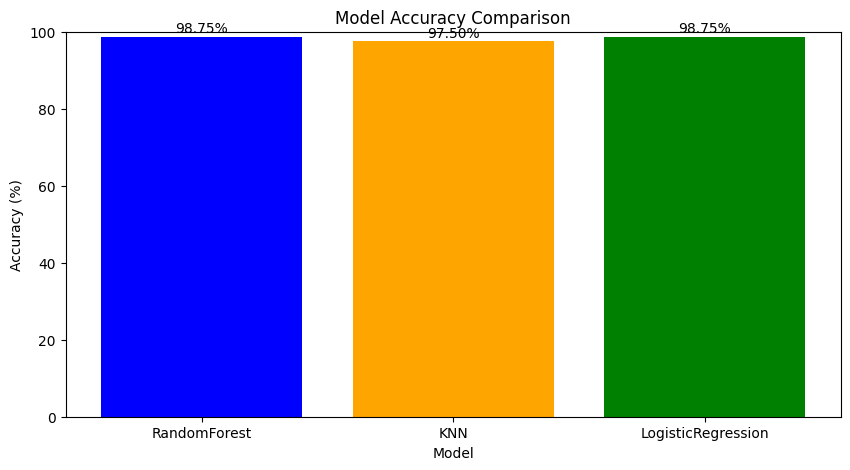

In [26]:
# Plot accuracy comparison
plt.figure(figsize=(10, 5))
plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'orange', 'green'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 100)
for i, (model, accuracy) in enumerate(accuracies.items()):
    plt.text(i, accuracy + 1, f'{accuracy:.2f}%', ha='center')
plt.show()